*ЗПШ-2021, сезон 29¾ :: "Как устроены случайности?"*
*zpsh@bochkarev.io*


# Занятие 3: случайные величины
- определение
- характеристики (распределение, матожидание, дисперсия)
- примеры случайных величин (видимо, дискретных)

In [145]:
import numpy as np
from scipy.special import comb
import seaborn as sns
import matplotlib.pyplot as plt
from math import factorial, exp, pi, sqrt

## Случайные события → случайные *величины*
Ранее мы определили вероятностное пространство $(\Omega, \mathcal{F}, \mathbb{P})$. Однако нас часто интересуют случайные *величины*, и не очень интересует структуа множества исходов. Можно ввести определение в духе следующего:

**Случайная величина** -- это такая функция $\xi: \Omega \rightarrow \mathbb{R}$. 

Точнее, она должна обладать свойством, что для любого "приличного" подмножества $B\subseteq \mathbb{R}$ (можно сказать "любого интервала $(a,b)$") технически возможно посчитать вероятность $\mathbb{P}(\xi \in B)$, т.е. $\xi^{-1}(B) \in \mathcal{F}$ -- есть "событие".

*Немного вкусных математических деталей: см., например, ["Теорвер"](https://tvims.nsu.ru/chernova/tv/tv_nsu07.pdf) Н.И. Черновой*

**Как описывать случайные величины?**

- для дискретного случая часто говорят про "функцию вероятности": $\mathbb{P}(\xi=x_i)=p_i$ для всех $i$.

*(про другие случаи еще поговорим)*

### Немного примеров
- Скажем, $\Omega=\{⚀, ⚁, ⚂, ⚃, ⚄, ⚅\}$ -- все тот же наш эксперимент с кубиками. Можно ввести $\xi(\omega)$ как количество выпавших очков. Ну то есть $\xi(⚄) := 5$ и т.д.

- А если я хочу, например, описать случайные числа от 1 до 100? (скажем, результаты теста) 

Я должен задать вероятности $p_1,\ldots, p_{100}$ (*так чтобы что?*) и понимать, что вероятность $\mathbb{P}(\xi=x)=0$ для любого $x\notin \{1,\ldots,100\}$.

В Python такие случайные числа можно получать, например, с помощью библиотеки numpy (хотя откуда и как брать случайность внутри компьютера -- отдельная, интересная тема):

In [15]:
np.random.randint(0,101)

20

- А что, если я хочу получать случайные целые числа (пусть, быть может, и не равновероятные)? Вот любые: $0,1,2,\ldots$ Такое возможно?

    * их, таких чисел, "сколько"?

    * какое должно выполняться условие на вероятности? Может ли вероятность в каждой точке быть ограничена снизу?
    * мешает ли это всё нам?

ОК, пример:

$$\mathbb{P}(\xi=x) := \frac{10^x}{x!}e^{-10},\quad x=1,2,3\ldots\nonumber$$

Смотрите какая интересная штука:

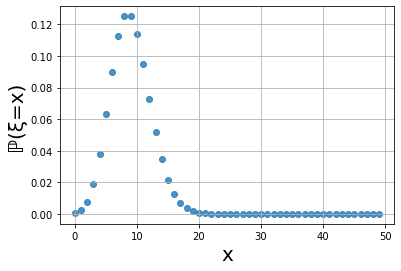

In [73]:
def show_p(p_func, N = 50, N0=1):
    p = [0.0] * N

    for x in range(N0, N):
        p[x - N0] = p_func(x)
    
    sns.regplot([x for x in range(N)],p, fit_reg=False)
    plt.grid()
    plt.xlabel("x", fontsize=20); plt.ylabel("ℙ(ξ=x)", fontsize=20);

show_p(p_func = lambda x: (10**x / factorial(x))*exp(-10))

In [39]:
p[-5:]

[3.795275613009963e-16,
 8.250599158717311e-17,
 1.7554466295143215e-17,
 3.6571804781548364e-18,
 7.463633628887421e-19]

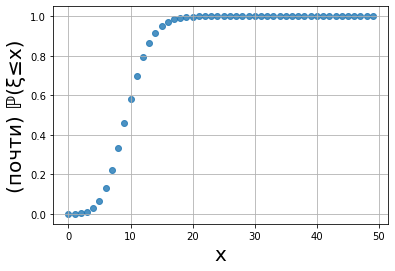

In [65]:
# Более того!
def show_cumulative_p(p_func, p0, N = 50):
    p_cumulative = [0.0] * N

    p_cumulative[0] = p0

    for x in range(1, N):
        p_cumulative[x] = p_cumulative[x-1] + p_func(x)
    
    sns.regplot([x for x in range(N)],p_cumulative, fit_reg=False)
    plt.grid()
    plt.xlabel("x", fontsize=20); plt.ylabel("(почти) ℙ(ξ≤x)", 
                                             fontsize=20);
    
show_cumulative_p(p_func=lambda x: (10**x / factorial(x))*exp(-10), p0=exp(-10))

In [48]:
p_cumulative[-5:]

[0.9999999999999998,
 0.9999999999999999,
 0.9999999999999999,
 0.9999999999999999,
 0.9999999999999999]

## Пример: схема Бернулли и биномиальное распределение.

- давайте бросать смещенную монетку (вероятность "успеха" $p$), $n$ раз...

Здесь можно отвечать на разные вопросы. Например, какова вероятность, что первый "успех" случится на $t$-й раз?

Конечно, $(1-p)^{t-1}p^t$.

- теперь давайте считать количество успехов. Это будет наша $\xi$.

Какова $\mathbb{P}(\xi = k)$, и почему?

$$\mathbb{P}(\xi=k) = C_n^k p^k (1-p)^{n-k}\nonumber,$$

и это называется "биномиальным" распределением.

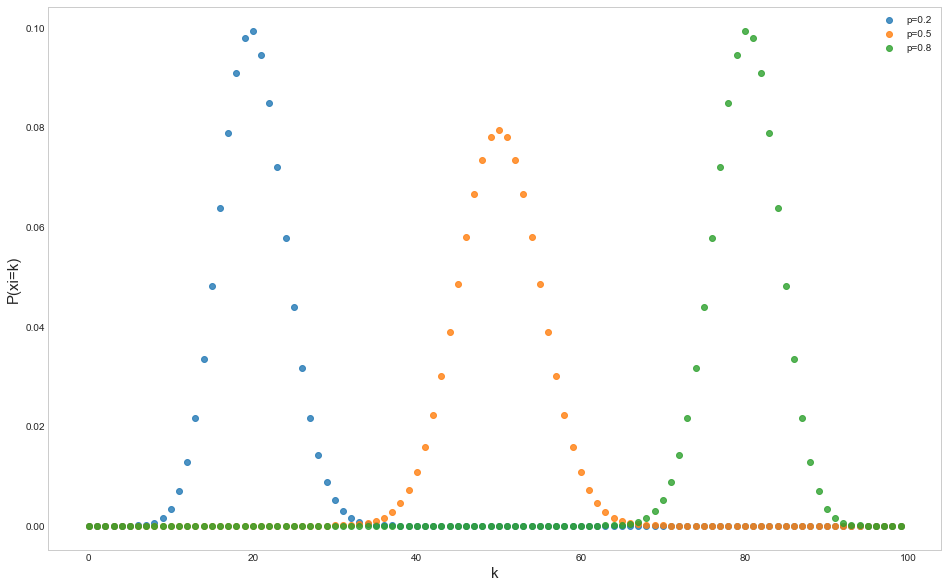

In [146]:
n = 100

plt.figure(figsize=(16,10))
for p in [0.2, 0.5, 0.8]:
    sns.regplot([i for i in range(n)], 
                [comb(n,k)*np.power(p, k)*np.power(1-p, n-k) for k in range(n)],
                fit_reg=False,
               label=f"p={p}")

plt.grid()
plt.legend()
plt.xlabel("k", fontsize=15); plt.ylabel("P(xi=k)", 
                                         fontsize=15);

#### Независимость случайных величин
Определяется аналогично:
- для событий было $\mathbb{P}(A\cap B) = \mathbb{P}(A)\mathbb{P}(B)$.
- для случайных величин:

... $\mathbb{P}(\xi=x, \eta=y)=\mathbb{P}(\xi=x)\mathbb{P}(\eta=y)$ для всех релевантных $x$ и $y$.

### Какие еще бывают (численные) характеристики случайных величин?
**Интуитивно:** среднее значение и разброс.

#### Математическое ожидание.
Если $\xi$ принимает значения $x_i$ с вероятностями $p_i$, то определим:

$$\mathbb{E}\xi := \sum_i x_i p_i\nonumber.$$

Всегда ли оно существует?

**Нет.** Представим $\xi=1,2,3,\ldots$ и $\mathbb{P}(\xi=x)=6/(\pi^2 x^2)$. Почему оно такое?
Оказывается, это вполне нормальная случайная величина:

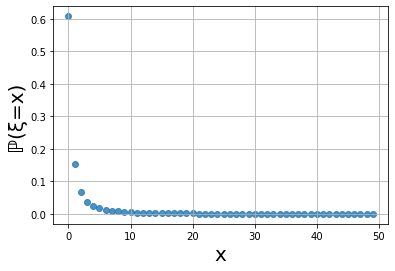

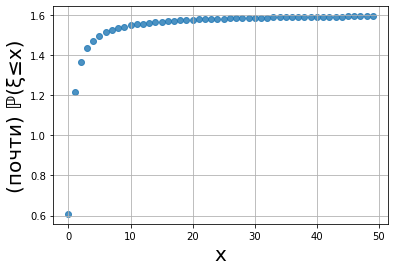

In [75]:
plt.figure()
show_p(p_func=lambda x: 6/((pi**2)*(x**2)), N0=1)

plt.figure()
show_cumulative_p(p_func=lambda x: 6/((pi**2)*(x**2)), p0=6/(pi**2))

При этом, если я захочу вычислить сумму $\sum_{x=1}^N x 6/(\pi^2 x^2)=\sum_{x=1}^N 6/(\pi^2 x)$, при увеличении $N$ я, конечно столкнусь вот с чем:

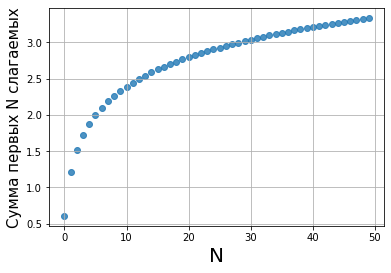

In [69]:
S = [0.0] * N

S[0] = 6/(pi**2)

for x in range(1, N):
    S[x] = S[x-1] + 6/(x*pi**2)

sns.regplot([x for x in range(N)],S, fit_reg=False)
plt.grid()
plt.xlabel("N", fontsize=20); plt.ylabel("Сумма первых N слагаемых", 
                                         fontsize=15);

#### Математическое ожидание.
Если $\xi$ принимает значения $x_i$ с вероятностями $p_i$, то определим:

$$\mathbb{E}\xi := \sum_i x_i p_i\nonumber.$$

Всегда ли оно существует? -- Нет, но это все равно полезная штука.

**Пара важных свойств:** 
- матожидание линейно -- для (любых) случайных величин $\xi$ и $\eta$, и (любых, неслучайных) чисел $a,b$:
$$\mathbb{E}[a\xi + b\eta]=a\mathbb{E}\xi + b\mathbb{E}\eta.\nonumber$$
- если $\xi$, $\eta$ -- независимы, то $\mathbb{E}[\xi\eta]=\mathbb{E}\xi\mathbb{E}\eta$.

**Посчитаем матожидание для $n$ испытаний схемы Бернулли**.

*как?*

- для одного испытания -- очевидно, $p$. Для суммы из $n$ -- по свойству выше, $np$.

#### Дисперсия.

$$D\xi := \mathbb{E}(\xi - E\xi)^2 = \mathbb{E}\xi^2 - (\mathbb{E}\xi)^2\nonumber$$

Часто говорят про **среднеквадратичное отклонение** $\sigma := \sqrt{D\xi}$.

Среди важных свойств выделим:
- $D[c\xi] = c^2D\xi$
- $D[\xi + c] = D\xi$
- если $\xi,\eta$ -- независимы, то $D[\xi+\eta]=D\xi+D\eta$.

**Посчитаем дисперсию для $n$ испытаний схемы Бернулли**.

*как?*

- для одного испытания -- очевидно, $p(1-p)$. Для суммы из $n$ -- по свойству выше, $np(1-p)$.

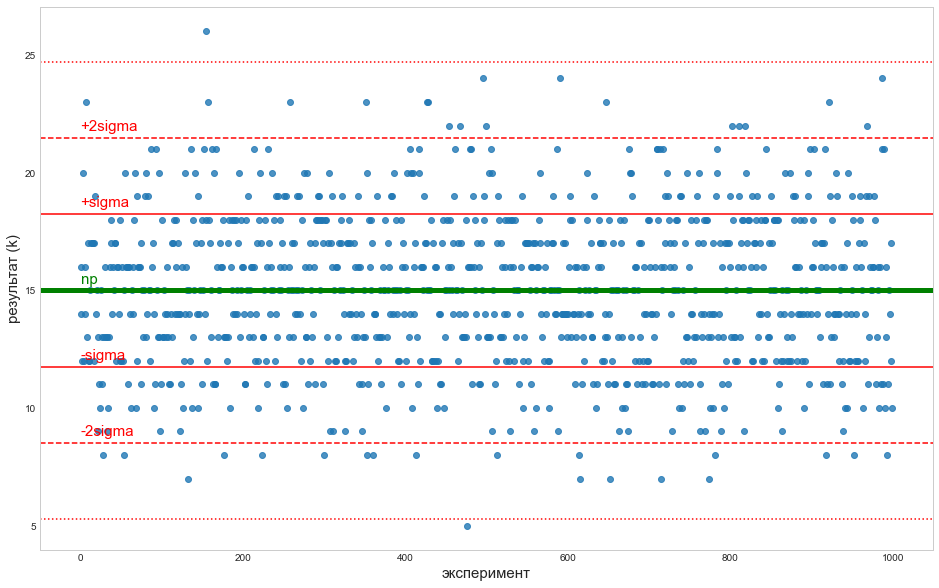

In [133]:
## Поясним численно
def make_bernoulli_trial(n, p):
    """Выполняет один эксперимент (в n испытаний)."""
    outcome = [ 1*(np.random.random() <= p) for _ in range(n) ]
    return np.sum(outcome)

n = 50
p = 0.3

N=1000

k = [ make_bernoulli_trial(n, p) for _ in range(N) ]


plt.figure(figsize=(16,10))
ax = sns.regplot([i for i in range(N)], k, fit_reg=False)
plt.grid()
plt.xlabel("эксперимент", fontsize=15); plt.ylabel("результат (k)", 
                                         fontsize=15);
plt.axhline(n*p,color='green', linewidth=5)
ax.text(0, n*p+0.3, "np", fontsize=15, color='green')

plt.axhline(n*p - sqrt(n*p*(1-p)), color='red', ls='solid')
ax.text(0, n*p - sqrt(n*p*(1-p))+0.3, "-sigma", fontsize=15, color='red')
plt.axhline(n*p + sqrt(n*p*(1-p)), color='red', ls='solid')
ax.text(0, n*p + sqrt(n*p*(1-p))+0.3, "+sigma", fontsize=15, color='red')

plt.axhline(n*p - 2*sqrt(n*p*(1-p)), color='red', ls='dashed')
ax.text(0, n*p - 2*sqrt(n*p*(1-p))+0.3, "-2sigma", fontsize=15, color='red')
plt.axhline(n*p + 2*sqrt(n*p*(1-p)), color='red', ls='dashed')
ax.text(0, n*p + 2*sqrt(n*p*(1-p))+0.3, "+2sigma", fontsize=15, color='red')

plt.axhline(n*p - 3*sqrt(n*p*(1-p)), color='red', ls='dotted')
plt.axhline(n*p + 3*sqrt(n*p*(1-p)), color='red', ls='dotted')